# partition-distributions-figure
6.17.24

Want to make a publication quality figure showing the distribution 
of quants following partitioning with both MCAR and MNAR schemes. 
Haven't previously done this for the entire joint quants matrix.

In [14]:
import pandas as pd 
import numpy as np
import torch
import sys
import matplotlib.pyplot as plt
import seaborn as sns

# Import my utils module
sys.path.append("../../../bin/")
from utils import *

# And my imputation models
sys.path.append("../../../bin/models/")
from lupine_models import Lupine

# plotting templates
sns.set(context="talk", style="ticks") 
sns.set_palette("tab10")

#### Some configs

In [15]:
# Paths for the component quants matrices
datasets_stem="/net/noble/vol2/home/lincolnh/data/quant-data/UMich-quants-matrices/"
joint_mat="joint-quants-matrix-umich.csv"

# Partitioning params
val_frac=0.0
test_frac=0.2
q_anchor=0.3
t_std=1.6
brnl_prob=0.6
min_pres=0
rand_seed=18

#### Read in the joint quants matrix

In [16]:
joint = pd.read_csv(datasets_stem + joint_mat, index_col=0)
quants = np.array(joint)

#### MCAR partition 

In [17]:
train_mcar, val_mcar, test_mcar, discard = \
    mcar_partition(
        quants, 
        val_frac=val_frac,
        test_frac=test_frac,
        min_present=min_pres,
        random_state=rand_seed,
)

#### MNAR partition 

In [18]:
# train_mnar, val_mnar, test_mnar, discard = \
#     mnar_partition_thresholds_matrix(
#         quants, 
#         q_anchor,
#         t_std,
#         brnl_prob,
#         min_pres=min_pres,
#         rand_state=rand_seed,
# )

train_mnar, test_mnar = mnar_partition_single_split(
                            quants, 
                            q_anchor,
                            t_std,
                            brnl_prob,
                            min_pres=min_pres,
                            rand_state=rand_seed,
)

#### Pre-process, for MCAR

In [19]:
# Flatten
quants_rav = quants.ravel()
train_rav_mcar = train_mcar.ravel()
val_rav_mcar = val_mcar.ravel()
test_rav_mcar = test_mcar.ravel()

# Get the present values from the original matrix
orig_nans_mcar = np.isnan(quants_rav)
orig_pres_mcar = quants_rav[~orig_nans_mcar]

# Get present values from the training matrix
train_nans_mcar = np.isnan(train_rav_mcar)
train_pres_mcar = train_rav_mcar[~train_nans_mcar]

# Get present values from the validation matrix
val_nans_mcar = np.isnan(val_rav_mcar)
val_pres_mcar = val_rav_mcar[~val_nans_mcar]

# Get present values from the test matrix
test_nans_mcar = np.isnan(test_rav_mcar)
test_pres_mcar = test_rav_mcar[~test_nans_mcar]

#### Pre-process, for MNAR

In [20]:
# Flatten
train_rav_mnar = train_mnar.ravel()
#val_rav_mnar = val_mnar.ravel()
test_rav_mnar = test_mnar.ravel()

# Get the present values from the original matrix
orig_nans_mnar = np.isnan(quants_rav)
orig_pres_mnar = quants_rav[~orig_nans_mnar]

# Get present values from the training matrix
train_nans_mnar = np.isnan(train_rav_mnar)
train_pres_mnar = train_rav_mnar[~train_nans_mnar]

# Get present values from the validation matrix
# val_nans_mnar = np.isnan(val_rav_mnar)
# val_pres_mnar = val_rav_mnar[~val_nans_mnar]

# Get present values from the test matrix
test_nans_mnar = np.isnan(test_rav_mnar)
test_pres_mnar = test_rav_mnar[~test_nans_mnar]

#### Plot 'em side-by-side

In [21]:
# fig, ax = plt.subplots(1, 2, figsize=(12,4))

# # THE MCAR PARTITION 
# #    The original (unpartitioned) matrix
# ax[0].hist(
#     orig_pres_mcar, 
#     bins=100,
#     linewidth=0.01,
#     color='#1f77b4', 
#     edgecolor='#1f77b4', 
#     alpha=1.0, 
#     label="Unpartitioned",
# )
# # The training set
# ax[0].hist(
#     train_pres_mcar, 
#     bins=100,
#     linewidth=0.01,
#     color='#ff7f0e', 
#     edgecolor='#ff7f0e', 
#     alpha=1.0, 
#     label="Training",
# )
# # The validation set
# ax[0].hist(
#     val_pres_mcar, 
#     bins=60,
#     linewidth=0.01,
#     color='#d62728', 
#     edgecolor='#d62728', 
#     alpha=1.0, 
#     label="Validation",
# )
# # The test set
# ax[0].hist(
#     test_pres_mcar, 
#     bins=60,
#     linewidth=0.01,
#     color='#2ca02c', 
#     edgecolor='#2ca02c', 
#     alpha=1.0, 
#     label="Test",
# )
# #ax[0].set_title("MCAR partition", pad=20, size=24)
# ax[0].set_title("Missing Completely \nat Random", pad=20, size=20)
# ax[0].set_xlabel("Protein Quant", labelpad=8)
# ax[0].set_ylabel("Counts", labelpad=8)
# ax[0].ticklabel_format(style='sci', axis='y', scilimits=(0,0))

# # THE MNAR PARTITION 
# #    The original (unpartitioned) matrix
# ax[1].hist(
#     orig_pres_mnar, 
#     bins=100,
#     linewidth=0.01,
#     color='#1f77b4', 
#     edgecolor='#1f77b4', 
#     alpha=1.0, 
#     label="Unpartitioned",
# )
# # The training set
# ax[1].hist(
#     train_pres_mnar, 
#     bins=100,
#     linewidth=0.01,
#     color='#ff7f0e', 
#     edgecolor='#ff7f0e', 
#     alpha=1.0, 
#     label="Training",
# )
# # The validation set
# ax[1].hist(
#     val_pres_mnar, 
#     bins=60,
#     linewidth=0.01,
#     color='#d62728', 
#     edgecolor='#d62728', 
#     alpha=1.0, 
#     label="Validation",
# )
# # The test set
# ax[1].hist(
#     test_pres_mnar, 
#     bins=60,
#     linewidth=0.01,
#     color='#2ca02c', 
#     edgecolor='#2ca02c', 
#     alpha=1.0, 
#     label="Test",
# )
# #ax[1].set_title("MNAR partition", pad=20, size=24)
# ax[1].set_title("Missing Not \nat Random", pad=20, size=20)
# ax[1].set_xlabel("Protein Quant", labelpad=8)
# ax[1].set_ylabel("")

# plt.minorticks_off()

# leg = plt.legend(bbox_to_anchor=(1.05, 1.05), edgecolor="k")
# for lh in leg.legendHandles: 
#     lh.set_alpha(1)
    
# ax[1].ticklabel_format(style='sci', axis='y', scilimits=(0,0))

# plt.show()
# #plt.savefig("figures/partitions-figure.pdf", bbox_inches="tight")

---
## Plot 'em individually
This is maybe for my Cascadia talk 

#### MCAR split

/tmp/ipykernel_2226774/4021599830.py:45: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for lh in leg.legendHandles:


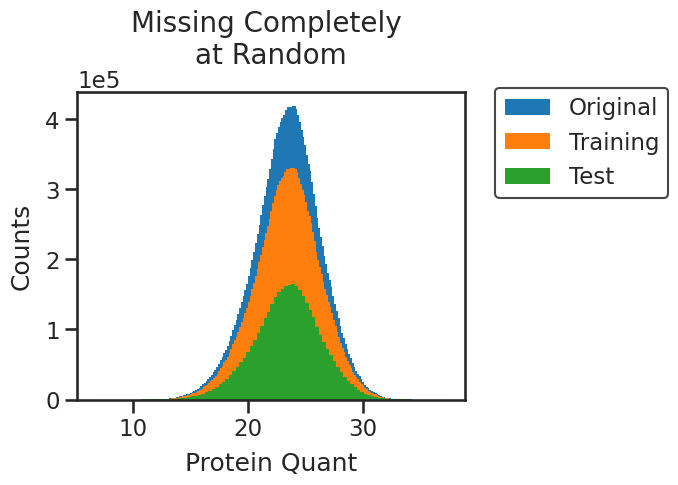

In [22]:
plt.figure(figsize=(5,4))

# The original (unpartitioned) matrix
plt.hist(
    orig_pres_mcar, 
    bins=200,
    linewidth=0.01,
    color='#1f77b4', 
    edgecolor='#1f77b4', 
    alpha=1.0, 
    label="Original",
)
# The training set
plt.hist(
    train_pres_mcar, 
    bins=200,
    linewidth=0.01,
    color='#ff7f0e', 
    edgecolor='#ff7f0e', 
    alpha=1.0, 
    label="Training",
)
# # The validation set
# plt.hist(
#     val_pres_mcar, 
#     bins=60,
#     linewidth=0.01,
#     color='#d62728', 
#     edgecolor='#d62728', 
#     alpha=1.0, 
#     label="Validation",
# )
# The test set
plt.hist(
    test_pres_mcar, 
    bins=100,
    linewidth=0.01,
    color='#2ca02c', 
    edgecolor='#2ca02c', 
    alpha=1.0, 
    label="Test",
)

leg = plt.legend(bbox_to_anchor=(1.05, 1.05), edgecolor="k")
for lh in leg.legendHandles: 
    lh.set_alpha(1)
    
plt.title("Missing Completely \nat Random", pad=20, size=20)
plt.xlabel("Protein Quant", labelpad=8)
plt.ylabel("Counts", labelpad=8)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

plt.show()
#plt.savefig("../figures/partitions-MCAR.pdf", bbox_inches="tight")

#### The MNAR partition 

/tmp/ipykernel_2226774/249202658.py:50: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for lh in leg.legendHandles:


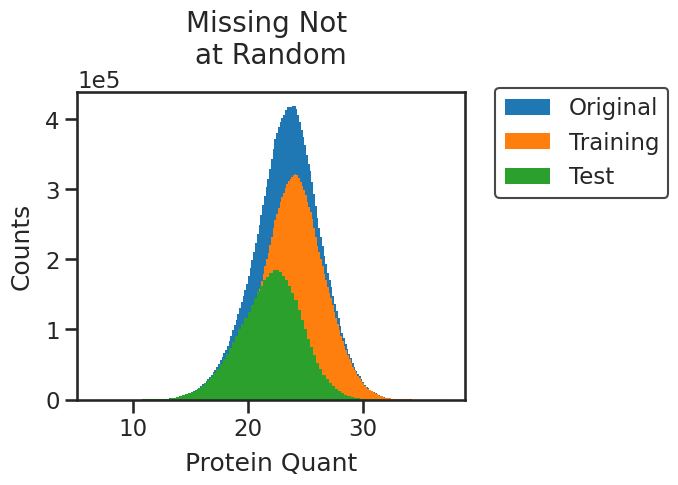

In [23]:
plt.figure(figsize=(5,4))

# The original (unpartitioned) matrix
plt.hist(
    orig_pres_mnar, 
    bins=200,
    linewidth=0.01,
    color='#1f77b4', 
    edgecolor='#1f77b4', 
    alpha=1.0, 
    label="Original",
)
# The training set
plt.hist(
    train_pres_mnar, 
    bins=200,
    linewidth=0.01,
    color='#ff7f0e', 
    edgecolor='#ff7f0e', 
    alpha=1.0, 
    label="Training",
)
# The validation set
# plt.hist(
#     val_pres_mnar, 
#     bins=60,
#     linewidth=0.01,
#     color='#d62728', 
#     edgecolor='#d62728', 
#     alpha=1.0, 
#     label="Validation",
# )
# The test set
plt.hist(
    test_pres_mnar, 
    bins=100,
    linewidth=0.01,
    color='#2ca02c', 
    edgecolor='#2ca02c', 
    alpha=1.0, 
    label="Test",
)
plt.title("Missing Not \nat Random", pad=20, size=20)
plt.xlabel("Protein Quant", labelpad=8)
plt.ylabel("Counts", labelpad=8)

plt.minorticks_off()

leg = plt.legend(bbox_to_anchor=(1.05, 1.05), edgecolor="k")
for lh in leg.legendHandles: 
    lh.set_alpha(1)
    
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

plt.show()
#plt.savefig("../figures/partitions-MNAR.pdf", bbox_inches="tight")

---
## What if I look into the data loaders a bit? 
And plot the results of the biased batch selection process. 

#### Get the data loader

In [24]:
batch_size=64
biased=True
rand_seed=19

train_loader = FactorizationDataset(
                        X=train_mnar,
                        X_val=None, 
                        partition="Train",
                        batch_size=batch_size, 
                        biased=biased,
                        shuffle=True, 
                        missing=False,
                        testing=False,
                        anchor=0.2,
                        iters=3,
                        std=0.4,
                        b_prob=0.8,
                        rand_seed=rand_seed,
)
train_loader.get_biased_loader()

#### Get all of the X_ijs in the loader
This takes an absurdly long time. But we likely don't have to wait until the very end. 

In [25]:
train_targets = np.array([])

for locs, target in train_loader:
    locs = locs.numpy()
    target = target.numpy()
    train_targets = np.append(train_targets, target)


KeyboardInterrupt



#### Plot, including the biased data loader 

/tmp/ipykernel_2226774/416186100.py:53: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for lh in leg.legendHandles:


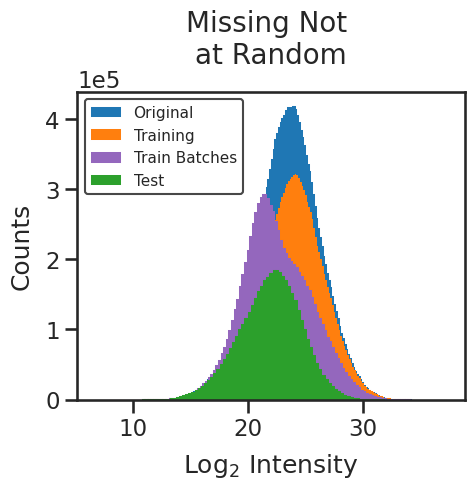

In [27]:
cutoff = int(np.floor(len(train_targets)*0.75))

plt.figure(figsize=(5,4))

# The original (unpartitioned) matrix
plt.hist(
    orig_pres_mnar, 
    bins=200,
    linewidth=0.01,
    color='#1f77b4', 
    edgecolor='#1f77b4', 
    alpha=1.0, 
    label="Original",
)
# The training set
plt.hist(
    train_pres_mnar, 
    bins=200,
    linewidth=0.01,
    color='#ff7f0e', 
    edgecolor='#ff7f0e', 
    alpha=1.0, 
    label="Training",
)
# The training data loader 
plt.hist(
    train_targets[:cutoff], 
    bins=130,
    linewidth=0.01,
    color='#9467bd', 
    edgecolor='#9467bd', 
    alpha=1.0, 
    label="Train Batches",
)
# The test set
plt.hist(
    test_pres_mnar, 
    bins=100,
    linewidth=0.01,
    color='#2ca02c', 
    edgecolor='#2ca02c', 
    alpha=1.0, 
    label="Test",
)
plt.title("Missing Not \nat Random", pad=20, size=20)
plt.xlabel("Log$_{2}$ Intensity", labelpad=8)

plt.ylabel("Counts", labelpad=8)

plt.minorticks_off()

leg = plt.legend(edgecolor="k", prop={"size":11})
for lh in leg.legendHandles: 
    lh.set_alpha(1)
    
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

plt.show()
#plt.savefig("../figures/partitions-MNAR-v4.pdf", bbox_inches="tight")

---
## Plot 'em side-by-side, again. 
No validation sets. 

In [ ]:
# fig, ax = plt.subplots(1, 2, figsize=(12,4))

# # THE MCAR PARTITION 
# #    The original (unpartitioned) matrix
# ax[0].hist(
#     orig_pres_mcar, 
#     bins=200,
#     linewidth=0.01,
#     color='#1f77b4', 
#     edgecolor='#1f77b4', 
#     alpha=1.0, 
#     label="Unpartitioned",
# )
# # The training set
# ax[0].hist(
#     train_pres_mcar, 
#     bins=200,
#     linewidth=0.01,
#     color='#ff7f0e', 
#     edgecolor='#ff7f0e', 
#     alpha=1.0, 
#     label="Training",
# )
# # The test set
# ax[0].hist(
#     test_pres_mcar, 
#     bins=100,
#     linewidth=0.01,
#     color='#2ca02c', 
#     edgecolor='#2ca02c', 
#     alpha=1.0, 
#     label="Test",
# )
# #ax[0].set_title("MCAR partition", pad=20, size=24)
# ax[0].set_title("Missing Completely \nat Random", pad=20, size=20)
# ax[0].set_xlabel("Protein Quant", labelpad=8)
# ax[0].set_ylabel("Counts", labelpad=8)
# ax[0].ticklabel_format(style='sci', axis='y', scilimits=(0,0))

# # THE MNAR PARTITION 
# #    The original (unpartitioned) matrix
# ax[1].hist(
#     orig_pres_mnar, 
#     bins=200,
#     linewidth=0.01,
#     color='#1f77b4', 
#     edgecolor='#1f77b4', 
#     alpha=1.0, 
#     label="Unpartitioned",
# )
# # The training set
# ax[1].hist(
#     train_pres_mnar, 
#     bins=200,
#     linewidth=0.01,
#     color='#ff7f0e', 
#     edgecolor='#ff7f0e', 
#     alpha=1.0, 
#     label="Training",
# )
# # The test set
# ax[1].hist(
#     test_pres_mnar, 
#     bins=100,
#     linewidth=0.01,
#     color='#2ca02c', 
#     edgecolor='#2ca02c', 
#     alpha=1.0, 
#     label="Test",
# )
# #ax[1].set_title("MNAR partition", pad=20, size=24)
# ax[1].set_title("Missing Not \nat Random", pad=20, size=20)
# ax[1].set_xlabel("Protein Quant", labelpad=8)
# ax[1].set_ylabel("")

# plt.minorticks_off()

# leg = plt.legend(bbox_to_anchor=(1.05, 1.05), edgecolor="k")
# for lh in leg.legendHandles: 
#     lh.set_alpha(1)
    
# ax[1].ticklabel_format(style='sci', axis='y', scilimits=(0,0))

# #plt.show()
# #plt.savefig("../figures/partitions-figure-v1.pdf", bbox_inches="tight")

#### Plot 'em on top of each other

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7,7), sharex=True)

# THE MCAR PARTITION 
#    The original (unpartitioned) matrix
ax1.hist(
    orig_pres_mcar, 
    bins=200,
    linewidth=0.01,
    color='#1f77b4', 
    edgecolor='#1f77b4', 
    alpha=1.0, 
    label="Unpartitioned",
)
# The training set
ax1.hist(
    train_pres_mcar, 
    bins=200,
    linewidth=0.01,
    color='#ff7f0e', 
    edgecolor='#ff7f0e', 
    alpha=1.0, 
    label="Training",
)
# The test set
ax1.hist(
    test_pres_mcar, 
    bins=100,
    linewidth=0.01,
    color='#2ca02c', 
    edgecolor='#2ca02c', 
    alpha=1.0, 
    label="Test",
)
ax1.set_title("MCAR partition", pad=12, size=22)
ax1.set_xlabel("", labelpad=8)
ax1.set_ylabel("Counts", labelpad=8)
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

ax1.legend(bbox_to_anchor=(1.05, 1.05), edgecolor="k")

# leg = plt.legend(bbox_to_anchor=(1.05, 1.05), edgecolor="k")
# for lh in leg.legendHandles: 
#     lh.set_alpha(1)

# THE MNAR PARTITION 
#    The original (unpartitioned) matrix
ax2.hist(
    orig_pres_mnar, 
    bins=200,
    linewidth=0.01,
    color='#1f77b4', 
    edgecolor='#1f77b4', 
    alpha=1.0, 
    label="Unpartitioned",
)
# The training set
ax2.hist(
    train_pres_mnar, 
    bins=200,
    linewidth=0.01,
    color='#ff7f0e', 
    edgecolor='#ff7f0e', 
    alpha=1.0, 
    label="Training",
)
# The test set
ax2.hist(
    test_pres_mnar, 
    bins=100,
    linewidth=0.01,
    color='#2ca02c', 
    edgecolor='#2ca02c', 
    alpha=1.0, 
    label="Test",
)
ax2.set_title("MNAR partition", pad=12, size=22)
ax2.set_xlabel("Log$_{2}$ Intensity", labelpad=8)
ax2.set_ylabel("Counts", labelpad=8)

plt.minorticks_off()

ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

plt.tight_layout()
plt.show()
#plt.savefig("../figures/partitions-figure-v1.pdf", bbox_inches="tight")